Code for data_management.md

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({
    'id': [1, 2, 3],
    'height': [170, 180, 175],
    'weight': [70, 80, 75],
    'blood_pressure': [120, 130, 125]
})
print(df.to_markdown(index=False))

|   id |   height |   weight |   blood_pressure |
|-----:|---------:|---------:|-----------------:|
|    1 |      170 |       70 |              120 |
|    2 |      180 |       80 |              130 |
|    3 |      175 |       75 |              125 |


In [3]:
# convert to long format
long_df = pd.melt(df, id_vars=['id'], var_name='measurement', value_name='value')
print(long_df.to_markdown(index=False))

|   id | measurement    |   value |
|-----:|:---------------|--------:|
|    1 | height         |     170 |
|    2 | height         |     180 |
|    3 | height         |     175 |
|    1 | weight         |      70 |
|    2 | weight         |      80 |
|    3 | weight         |      75 |
|    1 | blood_pressure |     120 |
|    2 | blood_pressure |     130 |
|    3 | blood_pressure |     125 |


### tidy data

In [4]:
df = pd.DataFrame({
    "site": ["H1", "H2", "H3"],
    "Stage1": np.random.randint(20, 50, size=3),
    "Stage2": np.random.randint(20, 50, size=3),
    "Stage3": np.random.randint(20, 50, size=3),
    "Stage4": np.random.randint(20, 50, size=3),
})
print(df.to_markdown(index=False))

| site   |   Stage1 |   Stage2 |   Stage3 |   Stage4 |
|:-------|---------:|---------:|---------:|---------:|
| H1     |       48 |       37 |       29 |       31 |
| H2     |       27 |       28 |       45 |       44 |
| H3     |       41 |       31 |       46 |       36 |


In [5]:
# melt the df

df_tidy = pd.melt(df, id_vars=["site"], 
    var_name="Stage", value_name="Frequency")
# make stage an integer
df_tidy.Stage = df_tidy.Stage.str.replace("Stage", "").astype(int)
print(df_tidy.to_markdown(index=False))

| site   |   Stage |   Frequency |
|:-------|--------:|------------:|
| H1     |       1 |          48 |
| H2     |       1 |          27 |
| H3     |       1 |          41 |
| H1     |       2 |          37 |
| H2     |       2 |          28 |
| H3     |       2 |          31 |
| H1     |       3 |          29 |
| H2     |       3 |          45 |
| H3     |       3 |          46 |
| H1     |       4 |          31 |
| H2     |       4 |          44 |
| H3     |       4 |          36 |


In [6]:
df = pd.DataFrame({
    "site": ["H1", "H2", "H3"],
    "Stg1Lng": np.random.randint(20, 50, size=3),
    "Stg2Lng": np.random.randint(20, 50, size=3),
    "Stg3Lng": np.random.randint(20, 50, size=3),
    "Stg4Lng": np.random.randint(20, 50, size=3),
    "Stg1Prs": np.random.randint(20, 50, size=3),
    "Stg2Prs": np.random.randint(20, 50, size=3),
    "Stg3Prs": np.random.randint(20, 50, size=3),
    "Stg4Prs": np.random.randint(20, 50, size=3),
})
print(df.to_markdown(index=False))

| site   |   Stg1Lng |   Stg2Lng |   Stg3Lng |   Stg4Lng |   Stg1Prs |   Stg2Prs |   Stg3Prs |   Stg4Prs |
|:-------|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|
| H1     |        41 |        38 |        41 |        26 |        23 |        45 |        31 |        29 |
| H2     |        23 |        30 |        30 |        26 |        40 |        41 |        30 |        36 |
| H3     |        49 |        40 |        42 |        42 |        49 |        34 |        41 |        26 |


In [7]:
# tidy this, first by melting
df_tidy = pd.melt(df, id_vars=["site"], 
    var_name="Stage_Cancer", value_name="Freq")
# then split Stage_Cancer into two columns
df_tidy[["Stage", "Cancer"]] = df_tidy.Stage_Cancer.str.extract(r'Stg(\d)(\w{3})')
del df_tidy["Stage_Cancer"]
# make Stage an integer
df_tidy.Stage = df_tidy.Stage.astype(int)
# reorder columns
df_tidy = df_tidy[["site", "Stage", "Cancer", "Freq"]]
print(df_tidy.to_markdown(index=False))

| site   |   Stage | Cancer   |   Freq |
|:-------|--------:|:---------|-------:|
| H1     |       1 | Lng      |     41 |
| H2     |       1 | Lng      |     23 |
| H3     |       1 | Lng      |     49 |
| H1     |       2 | Lng      |     38 |
| H2     |       2 | Lng      |     30 |
| H3     |       2 | Lng      |     40 |
| H1     |       3 | Lng      |     41 |
| H2     |       3 | Lng      |     30 |
| H3     |       3 | Lng      |     42 |
| H1     |       4 | Lng      |     26 |
| H2     |       4 | Lng      |     26 |
| H3     |       4 | Lng      |     42 |
| H1     |       1 | Prs      |     23 |
| H2     |       1 | Prs      |     40 |
| H3     |       1 | Prs      |     49 |
| H1     |       2 | Prs      |     45 |
| H2     |       2 | Prs      |     41 |
| H3     |       2 | Prs      |     34 |
| H1     |       3 | Prs      |     31 |
| H2     |       3 | Prs      |     30 |
| H3     |       3 | Prs      |     41 |
| H1     |       4 | Prs      |     29 |
| H2     |      

Variables stored in both rows and columns


In [8]:
# gather to create variables in both rows and columns
df_both = df_tidy.pivot_table(index=["site", "Cancer"], 
    columns="Stage", values="Freq").reset_index()
# rename columns to include Stage
df_both.columns.name = None
df_both = df_both.rename(columns={i: f"Stage{i}" for i in range(1,5)})
print(df_both.to_markdown(index=False))

| site   | Cancer   |   Stage1 |   Stage2 |   Stage3 |   Stage4 |
|:-------|:---------|---------:|---------:|---------:|---------:|
| H1     | Lng      |       41 |       38 |       41 |       26 |
| H1     | Prs      |       23 |       45 |       31 |       29 |
| H2     | Lng      |       23 |       30 |       30 |       26 |
| H2     | Prs      |       40 |       41 |       30 |       36 |
| H3     | Lng      |       49 |       40 |       42 |       42 |
| H3     | Prs      |       49 |       34 |       41 |       26 |


In [9]:
# gather to make it tidy
df_both_tidy = pd.melt(df_both, id_vars=["site", "Cancer"], 
    var_name="Stage", value_name="Frequency")
# make Stage an integer
df_both_tidy.Stage = df_both_tidy.Stage.str.replace("Stage", "").astype(int)
print(df_both_tidy.to_markdown(index=False))

| site   | Cancer   |   Stage |   Frequency |
|:-------|:---------|--------:|------------:|
| H1     | Lng      |       1 |          41 |
| H1     | Prs      |       1 |          23 |
| H2     | Lng      |       1 |          23 |
| H2     | Prs      |       1 |          40 |
| H3     | Lng      |       1 |          49 |
| H3     | Prs      |       1 |          49 |
| H1     | Lng      |       2 |          38 |
| H1     | Prs      |       2 |          45 |
| H2     | Lng      |       2 |          30 |
| H2     | Prs      |       2 |          41 |
| H3     | Lng      |       2 |          40 |
| H3     | Prs      |       2 |          34 |
| H1     | Lng      |       3 |          41 |
| H1     | Prs      |       3 |          31 |
| H2     | Lng      |       3 |          30 |
| H2     | Prs      |       3 |          30 |
| H3     | Lng      |       3 |          42 |
| H3     | Prs      |       3 |          41 |
| H1     | Lng      |       4 |          26 |
| H1     | Prs      |       4 |   

In [10]:
df1 = df_both_tidy.query('site=="H1"')
df2 = df_both_tidy.query('site=="H2"')
df3 = df_both_tidy.query('site=="H3"')

# merge data frames
df_merged = pd.concat([df1, df2, df3], ignore_index=True)
print(df_merged.to_markdown(index=False))

| site   | Cancer   |   Stage |   Frequency |
|:-------|:---------|--------:|------------:|
| H1     | Lng      |       1 |          41 |
| H1     | Prs      |       1 |          23 |
| H1     | Lng      |       2 |          38 |
| H1     | Prs      |       2 |          45 |
| H1     | Lng      |       3 |          41 |
| H1     | Prs      |       3 |          31 |
| H1     | Lng      |       4 |          26 |
| H1     | Prs      |       4 |          29 |
| H2     | Lng      |       1 |          23 |
| H2     | Prs      |       1 |          40 |
| H2     | Lng      |       2 |          30 |
| H2     | Prs      |       2 |          41 |
| H2     | Lng      |       3 |          30 |
| H2     | Prs      |       3 |          30 |
| H2     | Lng      |       4 |          26 |
| H2     | Prs      |       4 |          36 |
| H3     | Lng      |       1 |          49 |
| H3     | Prs      |       1 |          49 |
| H3     | Lng      |       2 |          40 |
| H3     | Prs      |       2 |   

### Tabular data file formats

In [11]:
# convert a brain image into a data frame, indexing by x,y,z coordinates

import nibabel as nib
import os
fsldir = os.getenv("FSLDIR")
img = nib.load(os.path.join(fsldir, "data", "standard", "MNI152_T1_2mm.nii.gz"))
data = img.get_fdata()
# get the coordinates of non-zero voxels
coords = np.array(np.nonzero(data)).T
# get the intensity values at those coordinates
intensities = data[coords[:,0], coords[:,1], coords[:,2]]
# create a data frame
df_brain = pd.DataFrame(coords, columns=["x", "y", "z"])
df_brain["intensity"] = intensities
print(df_brain.head().to_markdown(index=False))
print(df_brain.shape)


|   x |   y |   z |   intensity |
|----:|----:|----:|------------:|
|   0 |   1 |  26 |          28 |
|   0 |   1 |  27 |          28 |
|   0 |   1 |  28 |          29 |
|   0 |   1 |  29 |          31 |
|   0 |   1 |  30 |          29 |
(857785, 4)


In [12]:
# save this to csv and parquet

df_brain.to_csv('/tmp/brain_tabular.csv')
df_brain.to_parquet('/tmp/brain_tabular.parquet')

In [13]:
!du -sk /tmp/brain_tabular*

19464	/tmp/brain_tabular.csv
3804	/tmp/brain_tabular.parquet


In [14]:
3804/18576


0.20478036175710596

In [30]:
import time
# time loading of each format
# load 100 times to get average loading time of each format

nreps = 100
start = time.time()
for _ in range(nreps):
    df_csv = pd.read_csv('/tmp/brain_tabular.csv')
end = time.time()
csv_time = (end - start)/nreps
print(f"CSV load time: {csv_time:.4f} seconds")

start = time.time()
for _ in range(nreps):
    df_parquet = pd.read_parquet('/tmp/brain_tabular.parquet')
end = time.time()
parquet_time = (end - start)/nreps
print(f"Parquet load time: {parquet_time:.4f} seconds")
print(f'ratio {csv_time/parquet_time:.2f}')

CSV load time: 0.0719 seconds
Parquet load time: 0.0082 seconds
ratio 8.77


In [16]:
os.environ['TEMPLATEFLOW_HOME'] = '/Users/poldrack/.cache/templateflow'

In [35]:
### Multidimensional arrays

import templateflow.api as tf
difumo = tf.get('MNI152NLin6Asym', atlas='DiFuMo', desc='512dimensions', 
    resolution=2, suffix='probseg', extension='.nii.gz')
img = nib.load(difumo)
data = img.get_fdata()


In [36]:
data.shape

(91, 109, 91, 512)

proportion of nonzero voxels: 0.0010861328408460177


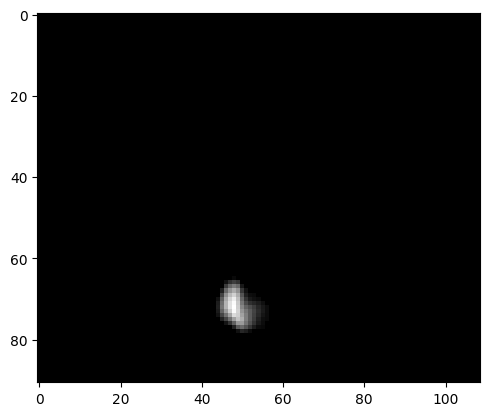

In [37]:
import matplotlib.pyplot as plt
threshold = 0.0001
data[data < threshold] = 0
print(f'proportion of nonzero voxels: {np.mean(data > 0.0001)}')
plt.imshow(data[:, :, 50, 5], cmap='gray')
plt.savefig('../../book/images/difumo_example.png')

In [38]:
np.save('/tmp/difumo.npy', data)
!du -sm /tmp/difumo.npy


3526	/tmp/difumo.npy


In [39]:
# save to hdf5
import h5py
with h5py.File('/tmp/difumo.h5', 'w') as f:
    f.create_dataset('difumo', data=data, compression='gzip')
!du -sm /tmp/difumo.h5

10	/tmp/difumo.h5


In [40]:
# save to zarr
import zarr
zarr_data = zarr.open('/tmp/difumo.zarr', mode='w', shape=data.shape, dtype=data.dtype)
zarr_data[:] = data
!du -sm /tmp/difumo.zarr

5	/tmp/difumo.zarr


In [41]:
#compare loading times for each type
nreps = 10

for ext in ['npy', 'h5', 'zarr']:
    start_time = time.time()
    filename = f'/tmp/difumo.{ext}'
    if ext == 'npy':
        for _ in range(nreps):
            data_loaded = np.load(filename)
    elif ext == 'h5':
        for _ in range(nreps):
            with h5py.File(filename, 'r') as f:
                data_loaded = f['difumo'][:]
    elif ext == 'zarr':
        for _ in range(nreps):
            zarr_data = zarr.open(filename, mode='r')
            data_loaded = zarr_data[:]
    end_time = time.time()
    avg_load_time = (end_time - start_time) / nreps
    print(f"Average loading time for {ext}: {avg_load_time:.6f} seconds")

Averate loading time for npy: 0.451627 seconds
Averate loading time for h5: 3.138907 seconds
Averate loading time for zarr: 0.745648 seconds


### Graph data

In [24]:
import networkx as nx

friends = [
    ('Bill', 'Sally'),
    ('Bill', 'Mark'),
    ('Bill', 'Elise'),
    ('Mark', 'Elise'),
    ('Mark', 'Lisa')
]
G = nx.Graph()
G.add_edges_from(friends)
G.edges

EdgeView([('Bill', 'Sally'), ('Bill', 'Mark'), ('Bill', 'Elise'), ('Mark', 'Elise'), ('Mark', 'Lisa')])

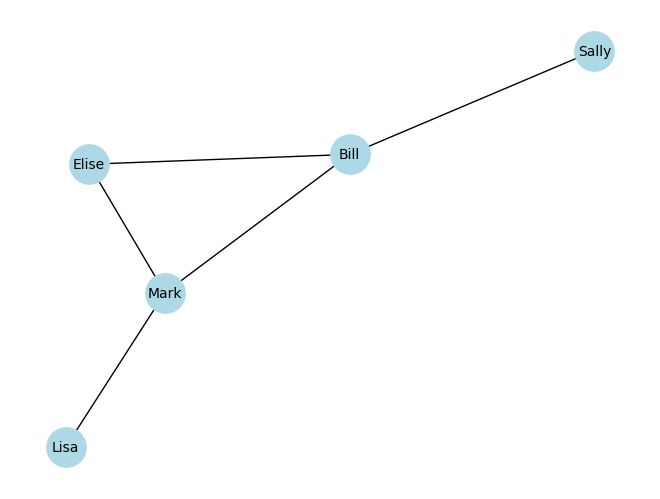

In [25]:
# plot spring-embeddding
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10)
plt.savefig('../../book/images/graph_example.png')

In [26]:
# generate adjacency matrix
adj_matrix = nx.adjacency_matrix(G).todense()
labels = list(G.nodes)
adj_df = pd.DataFrame(adj_matrix, index=labels, columns=labels)
print(adj_df.to_markdown())

|       |   Bill |   Sally |   Mark |   Elise |   Lisa |
|:------|-------:|--------:|-------:|--------:|-------:|
| Bill  |      0 |       1 |      1 |       1 |      0 |
| Sally |      1 |       0 |      0 |       0 |      0 |
| Mark  |      1 |       0 |      0 |       1 |      1 |
| Elise |      1 |       0 |      1 |       0 |      0 |
| Lisa  |      0 |       0 |      1 |       0 |      0 |


### File granularity

In [27]:
data = np.random.randn(10000, 100000)
data.shape

(10000, 100000)

In [28]:
tmpdir = '/tmp/array_granularity/'
if not os.path.exists(tmpdir):
    os.makedirs(tmpdir)

# save as single large file
np.save(os.path.join(tmpdir, 'data_large.npy'), data)

# save as multiple small files
for i in range(data.shape[0]):
    np.save(os.path.join(tmpdir, f'data_row_{i:04d}.npy'), data[i, :])

# test loading time
import time
start = time.time()
data_loaded_large = np.load(os.path.join(tmpdir, 'data_large.npy'))
end = time.time()
large_load_time = end - start
print(f"Loading time for large file: {large_load_time:.4f} seconds")

start = time.time()
data_loaded_small = np.array([np.load(os.path.join(tmpdir, f'data_row_{i:04d}.npy')) for i in range(data.shape[0])])
end = time.time()
small_load_time = end - start
print(f"Loading time for small files: {small_load_time:.4f} seconds")


Loading time for large file: 1.5613 seconds
Loading time for small files: 5.7783 seconds


### File naming

In [29]:
filename = 'sub-001_sess-1A_desc-Diffusion_fa.nii.gz'

def split_filename(filename):
    extension = '.'.join(filename.split('.')[1:])
    name = filename.split('.')[0]
    key_values = {k:v for k,v in (item.split('-') for item in name.split('_')[:-1])}
    key_values['suffix'] = name.split('_')[-1]
    return extension, key_values

extension, key_values = split_filename(filename)
pprint(key_values)




NameError: name 'pprint' is not defined

### DataLad


In [2]:
%cd ../..
%pwd

!rm -rf my_datalad_repo

/Users/poldrack/Dropbox/code/BetterCodeBetterScience


In [ ]:
# script to create a datalad repository, download data files, modify one of them, and save the changes
sudo rm -rf my_datalad_repo # sometimes requires sudo
datalad create my_datalad_repo
cd my_datalad_repo
mkdir data

datalad download-url --dataset . -O data/ \
  https://raw.githubusercontent.com/IanEisenberg/Self_Regulation_Ontology/refs/heads/master/Data/Complete_02-16-2019/meaningful_variables_clean.csv 
datalad download-url --dataset . -O data/ \
  https://raw.githubusercontent.com/IanEisenberg/Self_Regulation_Ontology/refs/heads/master/Data/Complete_02-16-2019/demographics.csv

datalad unlock data/demographics.csv

python ../src/BetterCodeBetterScience/modify_data.py data/demographics.csv
datalad save -m "removed Motivation variables from demographics.csv"
datalad status



In [10]:
# remove Motivation variables from demographics.csv
df = pd.read_csv('demographics.csv')
df = df.loc[:, ~df.columns.str.contains('Motivation')]
df.to_csv('demographics.csv', index=False)

In [11]:
!datalad status

 modified: /Users/poldrack/Dropbox/code/BetterCodeBetterScience/my_datalad_repo/data/demographics.csv (file)
 modified: /Users/poldrack/Dropbox/code/BetterCodeBetterScience/my_datalad_repo/data/meaningful_variables_clean.csv (file)
